In [26]:
# Kerakli kutubxonalar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from scipy.stats import mode
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
zip_path  = '/content/multiclassificationtask.zip'
extract_folder = '/content/multiclassificationtask'


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
 zip_ref.extractall(extract_folder)

os.listdir(extract_folder)


['sample_submission.csv', 'test.csv', 'train.csv']

In [3]:
train_df = pd.read_csv('/content/multiclassificationtask/train.csv')
train_df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,2178.0,D-penicillamine,16374.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,C
1,1,2644.0,D-penicillamine,17774.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,C
2,2,3069.0,Placebo,17844.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,C
3,3,2216.0,Placebo,19221.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,C
4,4,2256.0,Placebo,21600.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,1783.0,Placebo,23107.0,F,N,Y,N,S,1.3,243.0,3.76,58.0,944.0,97.00,93.0,233.0,9.9,4.0,C
14996,14996,3492.0,NaN,13149.0,F,NaN,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,273.0,10.3,2.0,C
14997,14997,1170.0,NaN,22646.0,F,NaN,NaN,NaN,N,0.8,NaN,3.14,NaN,NaN,NaN,NaN,280.0,10.6,3.0,C
14998,14998,1433.0,Placebo,21828.0,F,N,N,N,N,0.6,280.0,4.04,52.0,843.0,28.38,189.0,334.0,10.0,2.0,C


In [4]:
train_df.shape

(15000, 20)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8494 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8502 non-null   object 
 6   Hepatomegaly   8492 non-null   object 
 7   Spiders        8491 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6701 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8399 non-null   float64
 13  Alk_Phos       8488 non-null   float64
 14  SGOT           8486 non-null   float64
 15  Tryglicerides  6666 non-null   float64
 16  Platelets      14436 non-null  float64
 17  Prothrombin    14984 non-null  float64
 18  Stage 

In [6]:
train_df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6701.000000,15000.000000,8399.000000,8488.000000,8486.000000,6666.000000,14436.000000,14984.000000,15000.000000
mean,7499.500000,1971.721267,19298.658267,1.845433,329.177302,3.526103,75.647339,1618.598233,106.483631,111.387886,252.917983,10.626111,3.024800
std,4330.271354,1333.733576,3797.580260,2.674859,180.320802,0.372268,74.830472,1767.240078,57.206017,55.056133,94.049175,0.731416,0.871303
min,0.000000,3.000000,400.000000,0.200000,120.000000,0.500000,2.000000,3.400000,0.900000,19.000000,32.000000,9.000000,1.000000
25%,3749.750000,1095.000000,16658.000000,0.600000,242.000000,3.290000,31.000000,720.000000,71.000000,80.000000,181.000000,10.100000,2.000000
50%,7499.500000,1786.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,248.000000,10.600000,3.000000
75%,11249.250000,2635.000000,22347.000000,1.800000,364.000000,3.770000,89.000000,1664.000000,130.200000,133.000000,311.000000,11.000000,4.000000
max,14999.000000,38320.000000,129398.000000,28.000000,2078.000000,4.640000,662.000000,13862.400000,2653.000000,1669.000000,1024.000000,18.000000,4.000000


In [7]:
train_df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6701.000000,15000.000000,8399.000000,8488.000000,8486.000000,6666.000000,14436.000000,14984.000000,15000.000000
mean,7499.500000,1971.721267,19298.658267,1.845433,329.177302,3.526103,75.647339,1618.598233,106.483631,111.387886,252.917983,10.626111,3.024800
std,4330.271354,1333.733576,3797.580260,2.674859,180.320802,0.372268,74.830472,1767.240078,57.206017,55.056133,94.049175,0.731416,0.871303
min,0.000000,3.000000,400.000000,0.200000,120.000000,0.500000,2.000000,3.400000,0.900000,19.000000,32.000000,9.000000,1.000000
25%,3749.750000,1095.000000,16658.000000,0.600000,242.000000,3.290000,31.000000,720.000000,71.000000,80.000000,181.000000,10.100000,2.000000
50%,7499.500000,1786.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,248.000000,10.600000,3.000000
75%,11249.250000,2635.000000,22347.000000,1.800000,364.000000,3.770000,89.000000,1664.000000,130.200000,133.000000,311.000000,11.000000,4.000000
max,14999.000000,38320.000000,129398.000000,28.000000,2078.000000,4.640000,662.000000,13862.400000,2653.000000,1669.000000,1024.000000,18.000000,4.000000


In [8]:
train_df['Age'].isnull().sum()

np.int64(0)

In [9]:
# Datasetni Kategorik va Numeric ustunlarga ajratish
num_columns = ['N_Days','Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                      'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

cat_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
                        'Edema', ]

In [10]:
train_df.drop_duplicates(inplace=True)

Data Vizualizatsiya

<function matplotlib.pyplot.show(close=None, block=None)>

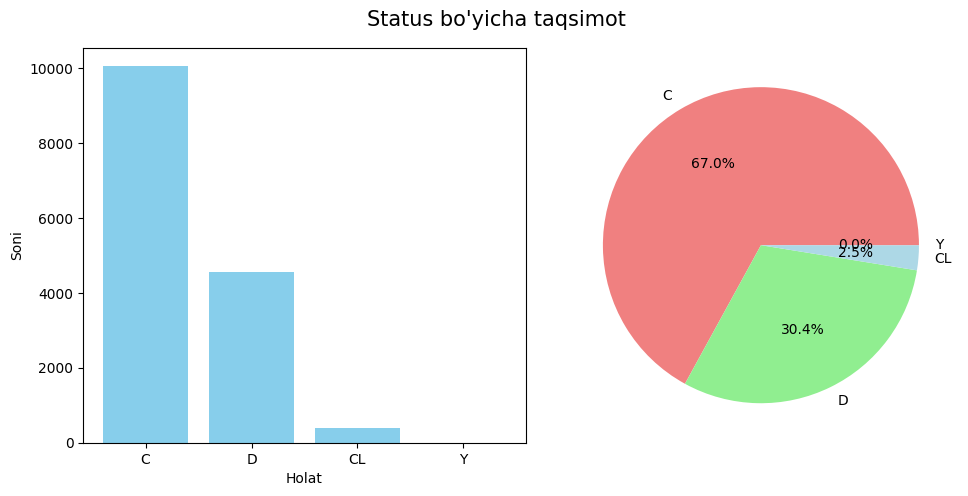

In [11]:
classes = train_df['Status'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# 1-grafik: Bar plot
ax[0].bar(classes.index, classes.values, color='skyblue')
ax[0].set_xlabel("Holat")
ax[0].set_ylabel("Soni")

# 2-grafik: Pie chart
ax[1].pie(classes.values, labels=classes.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'])


fig.suptitle("Status bo'yicha taqsimot", fontsize=15)
plt.tight_layout(pad=1)
plt.show

Yugoridagi grafikni tahlil qiladigan bo'lsak bu yerda D(vafot etgan)
C(Kuzatuvdagi yani davolanayotgan bemorlar )
CL(Davolashi to'xtatilgan bemor Jigar transpilantatsiyasi uchun)

Birinchi grafik (Bar): Bu grafikda Status ustunidagi har bir holat (D, C, CL) bo‘yicha bemorlar soni ko‘rsatilgan. Masalan, agar D=4500 bo‘lsa, bu 4500 bemor vafot etganini bildiradi.

Ikkinchi grafik (Pie): Bu grafikda har bir holatning foizdagi ulushi ko‘rsatilgan. Masalan, C=10,000 bo‘lsa va umumiy 15,000 bemor bo‘lsa, bu taxminan 67.0% ni tashkil qiladi.

Grafiklarda korish mumkin, "Y" qo'shimcha class qo'shilib qolgan, buni ustundan o'chirib yuboramiz






In [13]:
train_df = train_df[train_df['Status'] != 'Y']

Numeric ustun uchun Vizualizatsiya

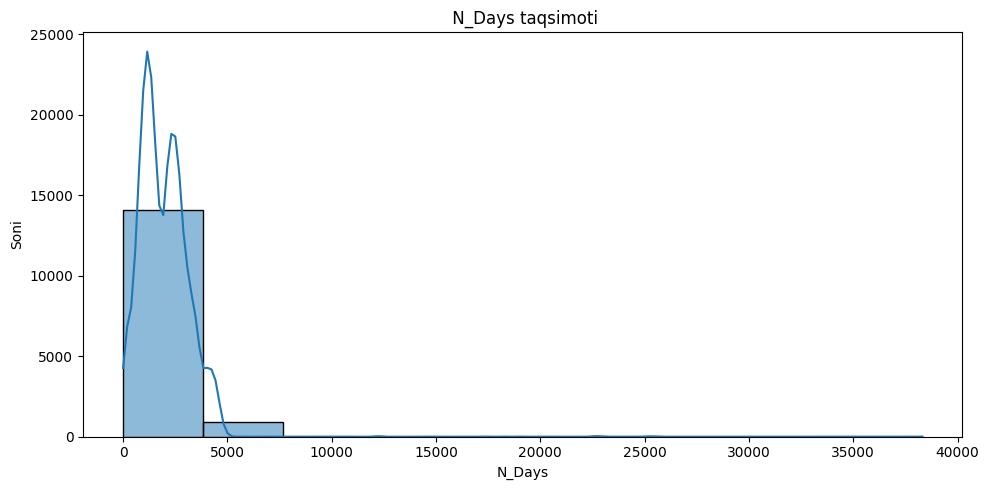

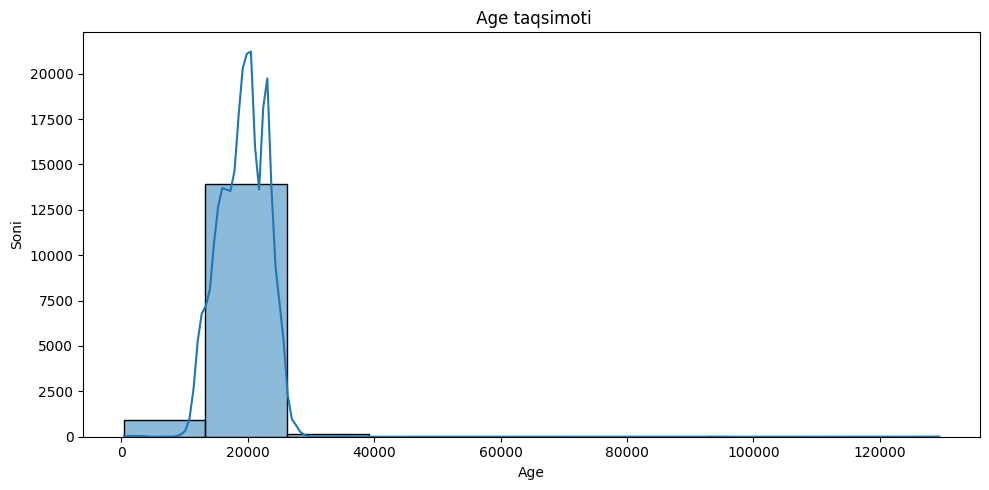

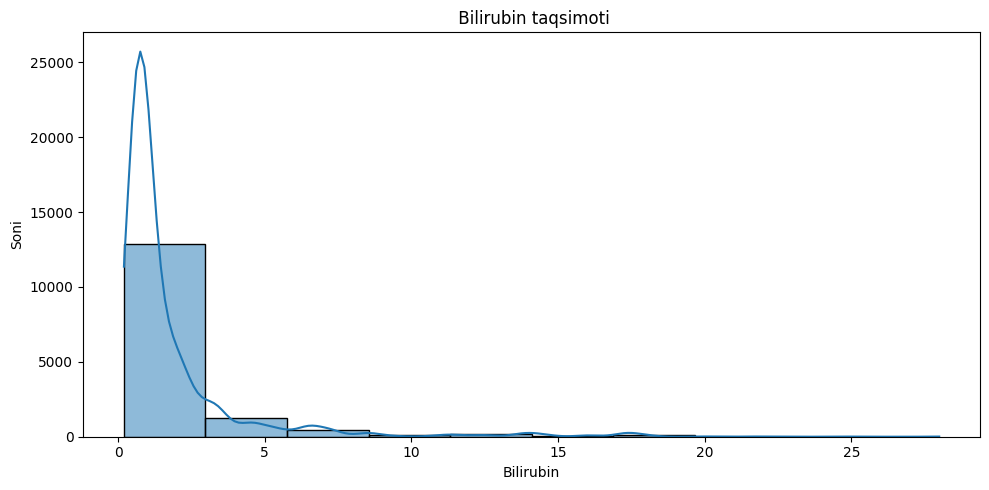

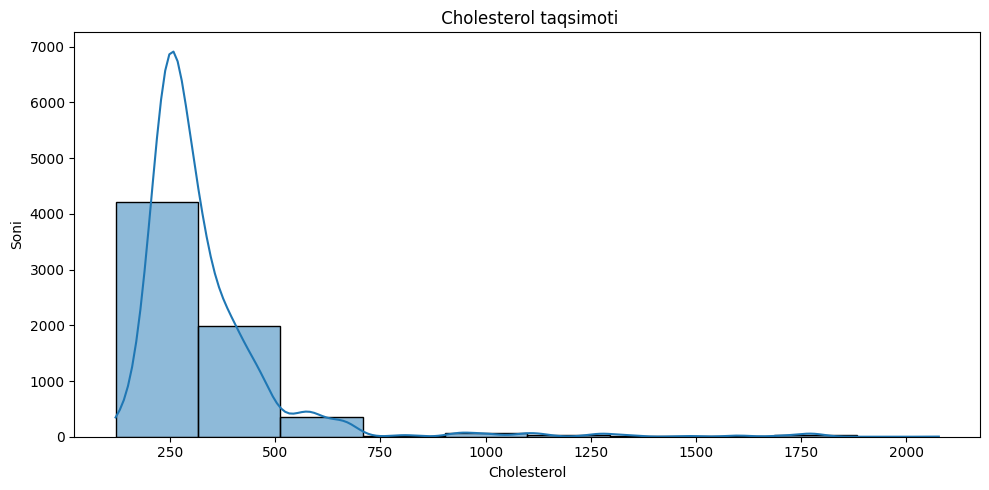

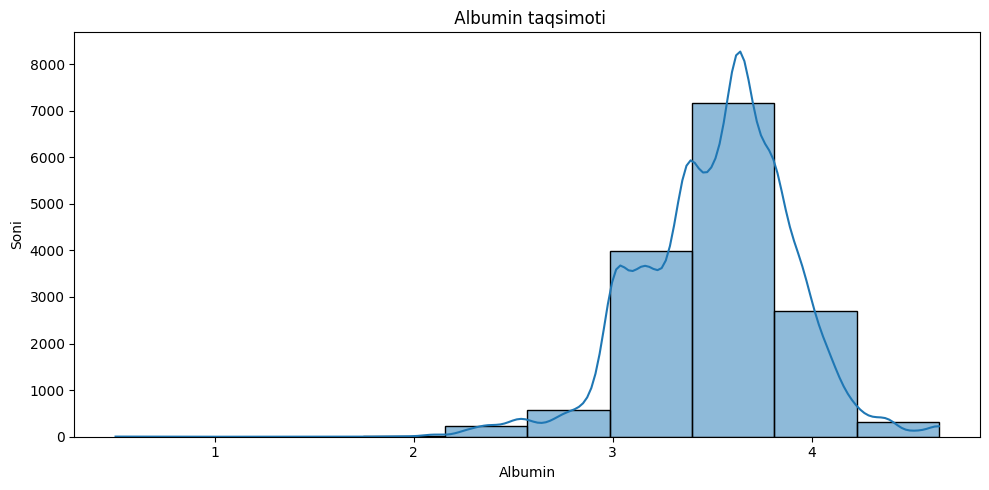

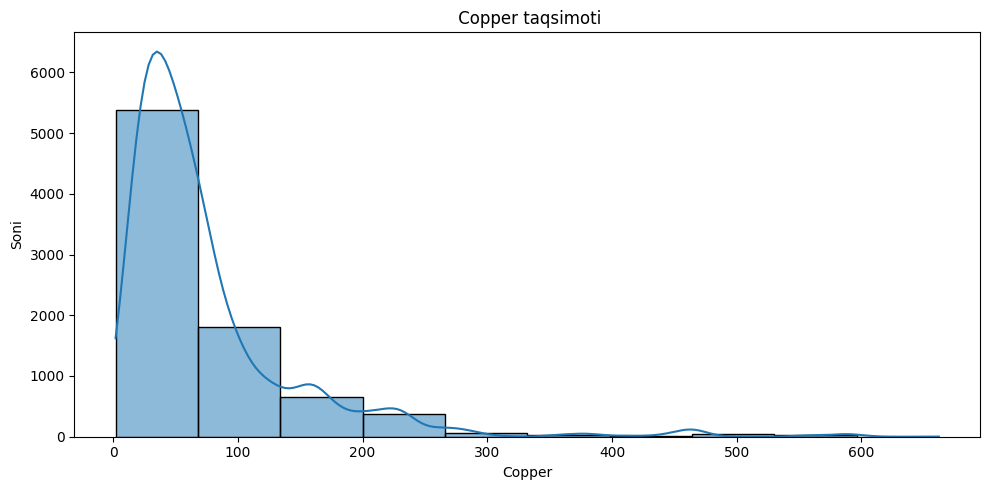

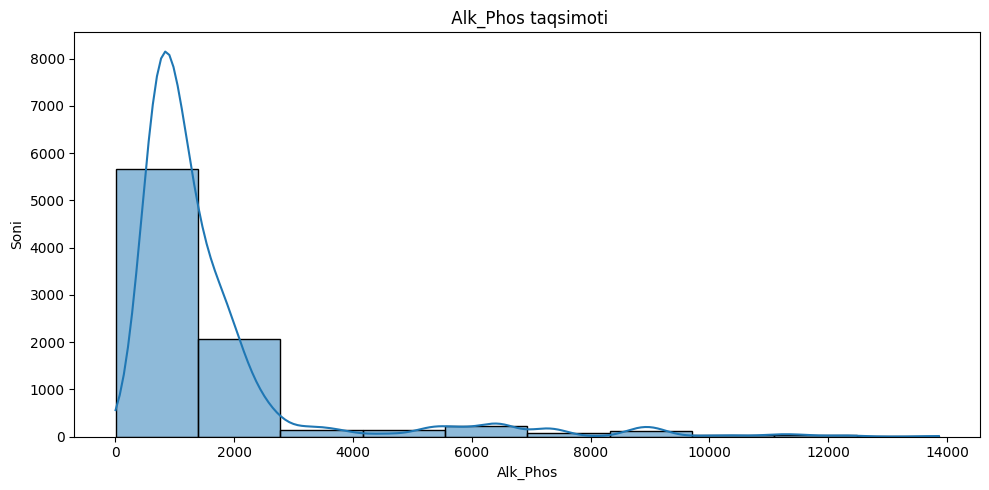

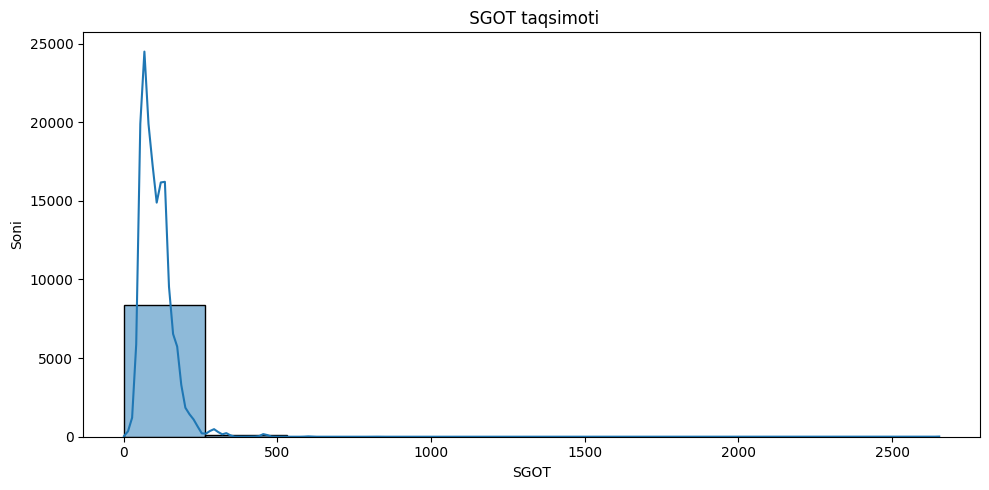

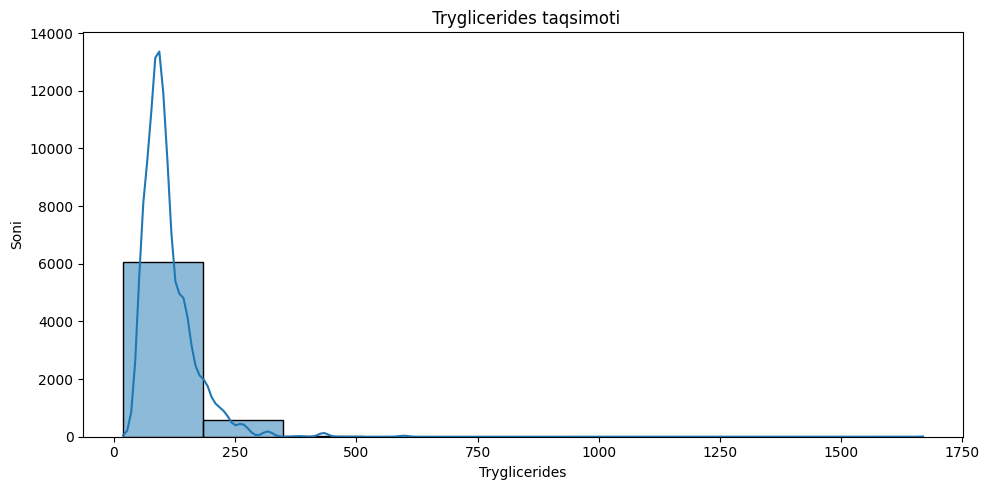

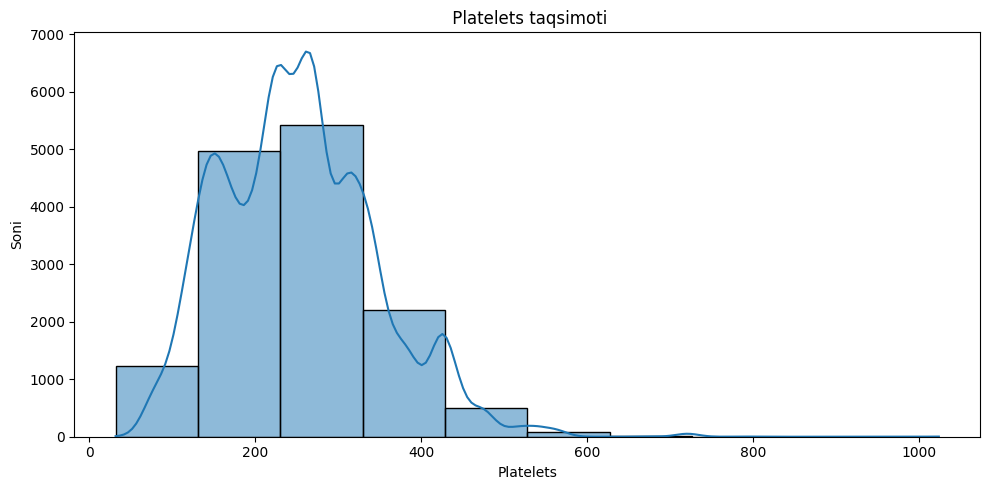

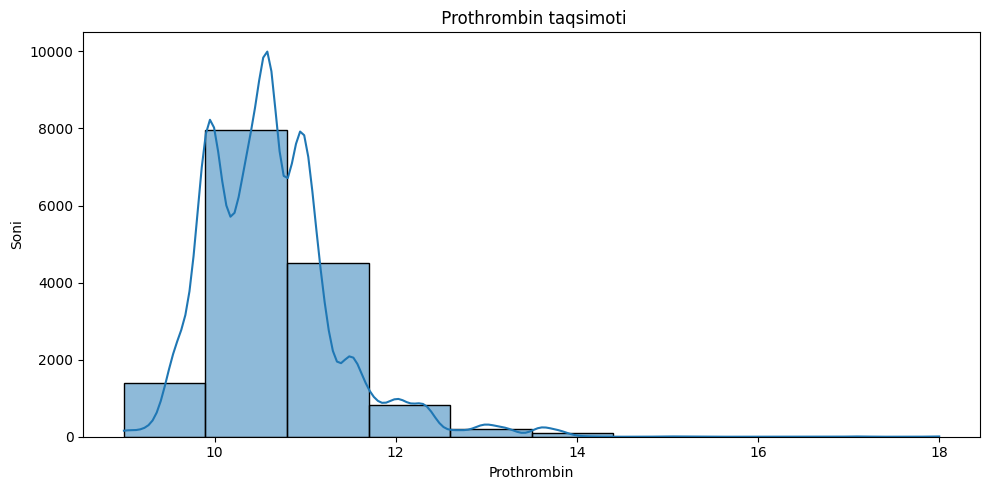

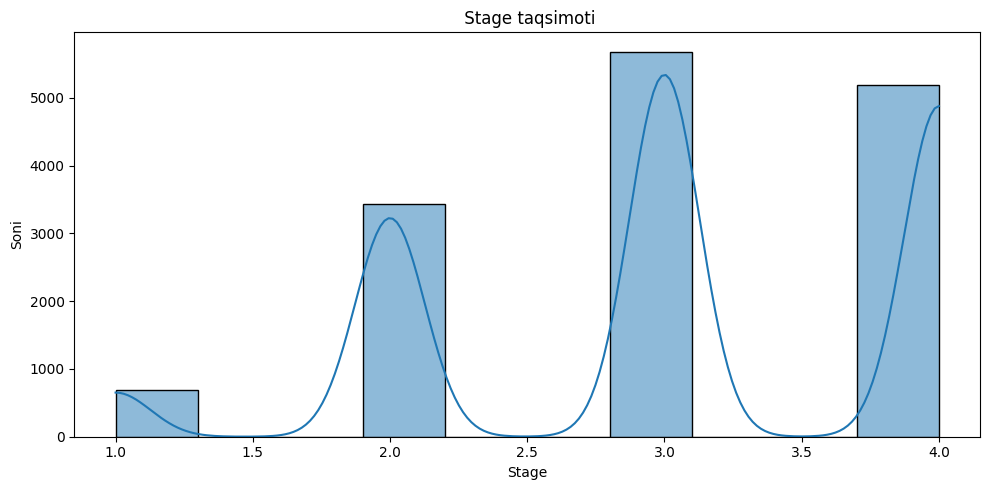

In [12]:
for column in num_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=train_df, x=column, bins=10, kde=True)
    plt.xlabel(column)
    plt.ylabel('Soni')
    plt.title(f' {column} taqsimoti')
    plt.tight_layout()
    plt.show()


Kategorik ustun uchun Vizualizatsiya

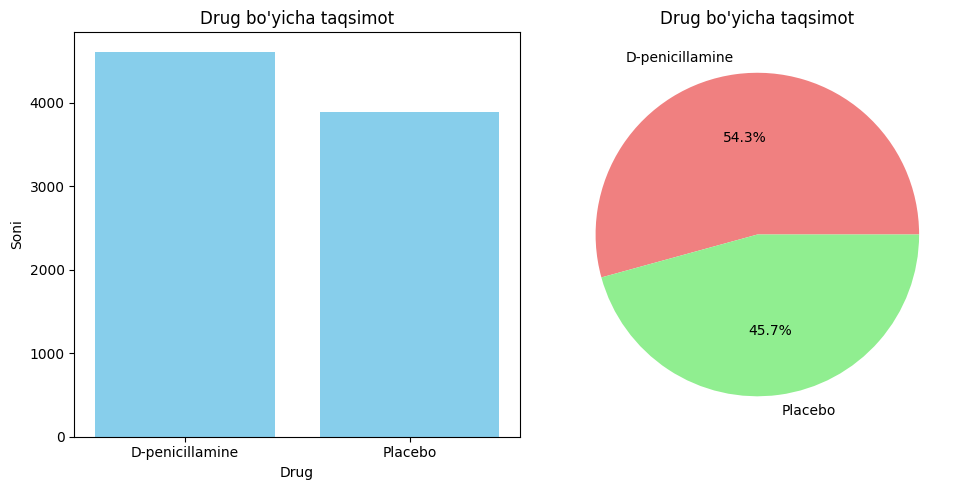

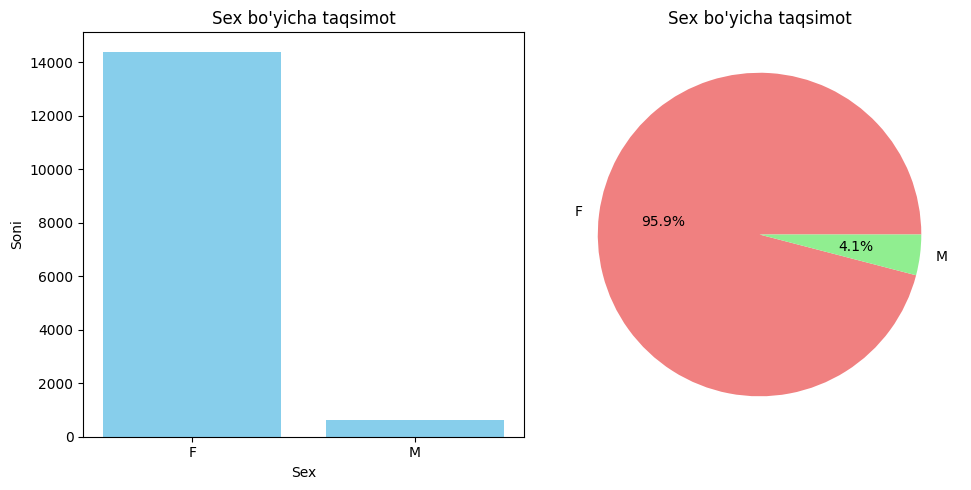

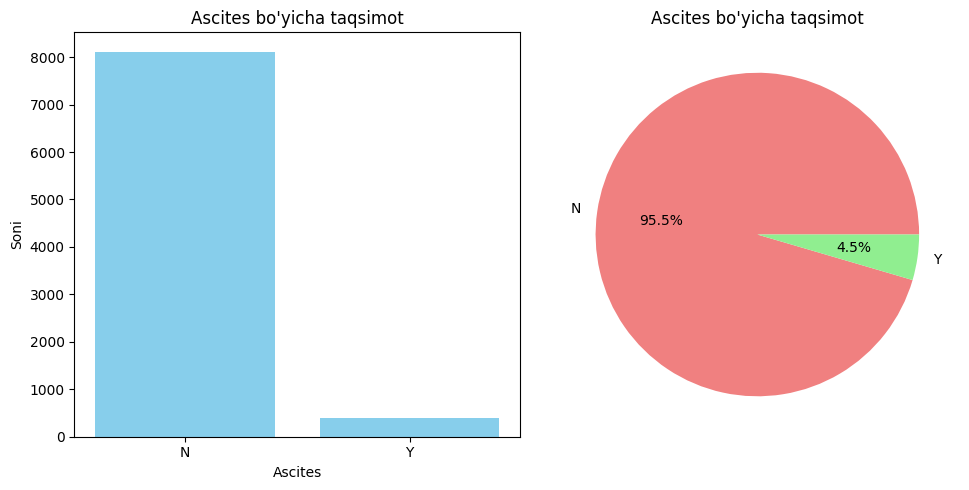

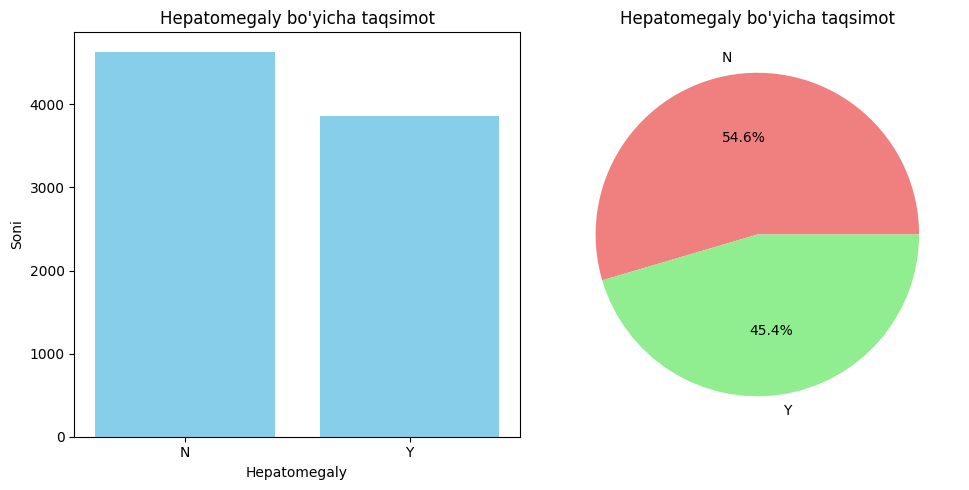

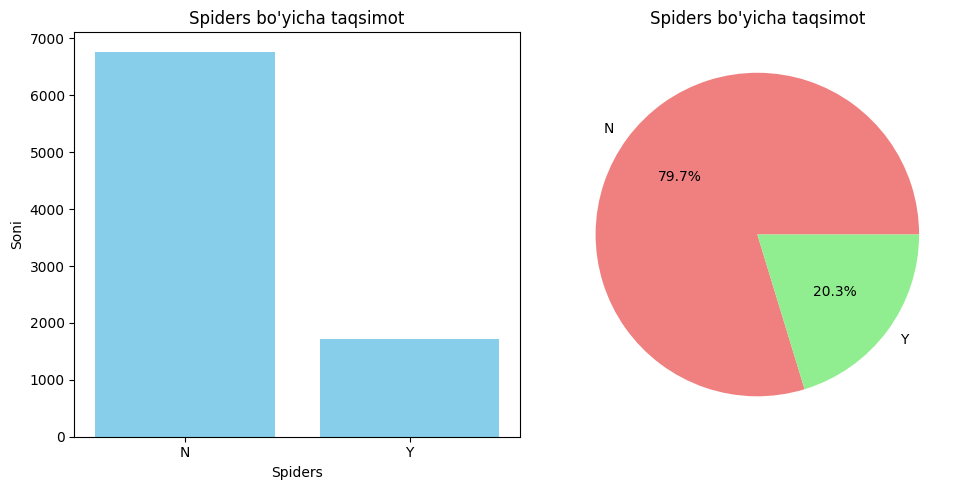

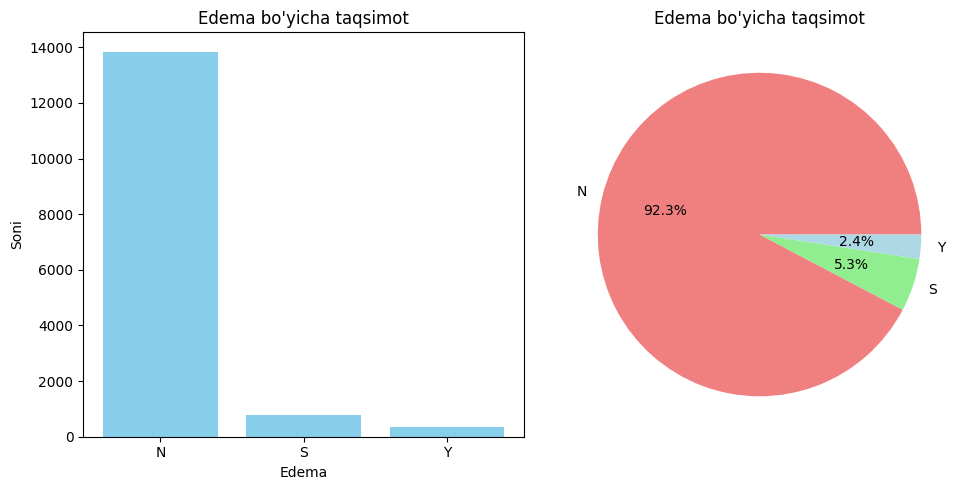

In [13]:
for col in cat_columns:
    counts = train_df[col].value_counts()
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # Barchart
    ax[0].bar(counts.index, counts.values, color='skyblue')
    ax[0].set_title(f"{col} bo'yicha taqsimot")
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Soni")

    # Pie chart
    ax[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue', 'lightyellow'])
    ax[1].set_title(f"{col} bo'yicha taqsimot")

    plt.tight_layout()
    plt.show

Malumotlarni tayyorlash

In [14]:
train_df['Status'].value_counts()

,count
Status,
C,10053
D,4565
CL,381
Y,1


In [15]:
# Status ustunini encode qilish
train_df['Status']=train_df['Status'].map({'D':0, 'C':1, 'CL':2})

Pipeline yaratish

In [16]:
# sonli ustunlar uchun
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# kategorik ustunar uchun
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

In [17]:
# Column Transformer
preprocessor = ColumnTransformer([
    ('numerical', num_pipeline, num_columns),
    ('categorical', cat_pipeline, cat_columns)
])

In [18]:
X = train_df.drop('Status', axis=1)
y = train_df['Status']

In [19]:
X['Age'] = X['Age']//365
X

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2178.0,D-penicillamine,44.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0
1,1,2644.0,D-penicillamine,48.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0
2,2,3069.0,Placebo,48.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0
3,3,2216.0,Placebo,52.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0
4,4,2256.0,Placebo,59.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,1783.0,Placebo,63.0,F,N,Y,N,S,1.3,243.0,3.76,58.0,944.0,97.00,93.0,233.0,9.9,4.0
14996,14996,3492.0,NaN,36.0,F,NaN,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,273.0,10.3,2.0
14997,14997,1170.0,NaN,62.0,F,NaN,NaN,NaN,N,0.8,NaN,3.14,NaN,NaN,NaN,NaN,280.0,10.6,3.0
14998,14998,1433.0,Placebo,59.0,F,N,N,N,N,0.6,280.0,4.04,52.0,843.0,28.38,189.0,334.0,10.0,2.0


In [20]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [22]:
X_test_processed.shape

(3000, 25)

Mashine Learning

In [32]:
print("NaN soni:", y_test.isna().sum())


NaN soni: 1


In [33]:
# Eng ko'p uchraydigan qiymat (moda) bilan NaN ni to'ldirish
y_test.fillna(y_test.mode().iloc[0], inplace=True)


In [34]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1.0)
}

results = {}
# Klasslar ro'yxatini aniqlash
all_classes = np.unique(np.concatenate((y_train, y_test)))

for name, model in models.items():
    print(f"Model: {name}")
    # Modelni o'rgatish
    model.fit(X_train_processed, y_train)

    #Bashorat
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)
    if y_pred_proba.shape[1] == 2:
        y_pred_proba = y_pred_proba[:, 1]
    else:

        pass

   # Clip qilish
    y_pred_proba_clipped = np.clip(y_pred_proba, 1e-15, 1 - 1e-15)




# logloss hisoblash
most_common = y_test.mode().iloc[0]
y_test_imputed = y_test.fillna(most_common)
logloss = log_loss(y_test_imputed, y_pred_proba_clipped, labels=all_classes)
# accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"Logloss: {logloss:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

results[name] = {
        'Accuracy': acc,
        'Logloss': logloss
    }

Model: Decision Tree
Model: Random Forest
Model: Gradient Boosting
Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:49:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8560
Logloss: 0.3955

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79       912
         1.0       0.88      0.92      0.90      2013
         2.0       0.41      0.17      0.24        75

    accuracy                           0.86      3000
   macro avg       0.70      0.62      0.64      3000
weighted avg       0.85      0.86      0.85      3000



In [35]:
y_pred_proba_clipped

array([[2.5900267e-02, 9.7353584e-01, 5.6383567e-04],
       [3.2117598e-02, 9.6745348e-01, 4.2895554e-04],
       [5.9632772e-01, 4.0349969e-01, 1.7256926e-04],
       ...,
       [9.7455829e-01, 2.5274128e-02, 1.6763291e-04],
       [1.1732205e-02, 9.8406535e-01, 4.2023957e-03],
       [7.6387689e-02, 9.2032331e-01, 3.2889829e-03]], dtype=float32)

In [36]:
# Eng yaxshi modelni log loss boyicha tanlash
best_model_name = min(results.items(), key=lambda x: x[1]['Logloss'])[0]
best_model = models[best_model_name]
print(f"\n Eng yaxshi model (LogLoss boyicha): {best_model_name} (LogLoss: {results[best_model_name]['Logloss']:.4f})")


 Eng yaxshi model (LogLoss boyicha): XGBoost (LogLoss: 0.3955)


Submission csv

In [37]:
test_df = pd.read_csv('/content/multiclassificationtask/test.csv')
test_df.head()


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,22646.0,NaN,22646.0,F,NaN,NaN,NaN,N,1.4,NaN,3.34,NaN,NaN,NaN,NaN,190.0,11.0,4.0
1,15001,2149.0,NaN,18993.0,F,NaN,NaN,NaN,N,0.9,NaN,3.24,NaN,NaN,NaN,NaN,233.0,9.0,2.0
2,15002,3850.0,D-penicillamine,16050.0,M,N,N,N,N,1.0,460.0,3.64,75.0,2148.0,102.3,118.0,172.0,10.6,3.0
3,15003,2419.0,D-penicillamine,20354.0,F,N,N,N,N,0.6,258.0,3.96,31.0,642.0,70.0,83.0,336.0,10.8,2.0
4,15004,1086.0,NaN,23376.0,F,NaN,NaN,NaN,N,4.4,NaN,4.40,NaN,NaN,NaN,NaN,447.0,10.3,2.0


In [38]:
test_df.shape


(10000, 19)

In [39]:
test_df.isnull().sum()

,0
id,0
N_Days,0
Drug,4398
Age,0
Sex,0
Ascites,4391
Hepatomegaly,4402
Spiders,4404
Edema,0
Bilirubin,0


In [40]:
test_df['Age'] = test_df['Age']//365
test_df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,22646.0,NaN,62.0,F,NaN,NaN,NaN,N,1.4,NaN,3.34,NaN,NaN,NaN,NaN,190.0,11.0,4.0
1,15001,2149.0,NaN,52.0,F,NaN,NaN,NaN,N,0.9,NaN,3.24,NaN,NaN,NaN,NaN,233.0,9.0,2.0
2,15002,3850.0,D-penicillamine,43.0,M,N,N,N,N,1.0,460.0,3.64,75.0,2148.0,102.30,118.0,172.0,10.6,3.0
3,15003,2419.0,D-penicillamine,55.0,F,N,N,N,N,0.6,258.0,3.96,31.0,642.0,70.00,83.0,336.0,10.8,2.0
4,15004,1086.0,NaN,64.0,F,NaN,NaN,NaN,N,4.4,NaN,4.40,NaN,NaN,NaN,NaN,447.0,10.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,2106.0,Placebo,45.0,F,N,N,N,N,1.1,1128.0,3.35,91.0,815.0,127.10,166.0,421.0,9.6,1.0
9996,24996,186.0,D-penicillamine,35.0,M,N,Y,N,N,0.6,267.0,3.02,225.0,728.0,120.90,90.0,142.0,12.3,4.0
9997,24997,3458.0,D-penicillamine,55.0,F,N,N,N,N,0.9,NaN,3.35,136.0,1995.0,128.00,NaN,243.0,10.6,2.0
9998,24998,2891.0,D-penicillamine,55.0,F,N,N,N,N,0.8,NaN,3.75,63.0,674.0,26.35,NaN,325.0,10.0,1.0


In [41]:
# Avval yaratgan  pipeline orqali test setni ham transform qilish
test_processed = preprocessor.transform(test_df)

In [42]:
# Bashorat
y_test_bashorat = best_model.predict(test_processed)
y_test_bashorat_proba = best_model.predict_proba(test_processed)

# Ehtimolliklarni [1e-15, 1-1e-15] oralig‘ida chegaralash
y_test_bashorat_proba_clipp = np.clip(y_test_bashorat_proba, 1e-15, 1 - 1e-15)

In [43]:
y_test_bashorat_proba.shape

(10000, 3)

In [44]:
y_test_bashorat_proba_clipp

array([[5.10186076e-01, 4.88748729e-01, 1.06512813e-03],
       [1.08586274e-01, 8.87446821e-01, 3.96689586e-03],
       [2.76850820e-01, 7.22832859e-01, 3.16308637e-04],
       ...,
       [6.32815287e-02, 9.35798883e-01, 9.19592509e-04],
       [1.00205196e-02, 9.89945233e-01, 3.41693922e-05],
       [3.64275873e-01, 6.02367282e-01, 3.33568864e-02]], dtype=float32)

In [45]:
id = test_df['id']
id

,id
0,15000
1,15001
2,15002
3,15003
4,15004
...,...
9995,24995
9996,24996
9997,24997
9998,24998


In [46]:
model.classes_

array([0, 1, 2])

In [48]:
print(len(id))
print(y_test_bashorat_proba_clipp.shape)

10000
(10000, 3)


In [50]:
submission = pd.DataFrame({
    'id':id,
    'Status_C':y_test_bashorat_proba_clipp[:,1],
    'Status_CL':y_test_bashorat_proba_clipp[:,2],
    'Status_D':y_test_bashorat_proba_clipp[:,0]
})
submission

,id,Status_C,Status_CL,Status_D
0,15000,0.488749,0.001065,0.510186
1,15001,0.887447,0.003967,0.108586
2,15002,0.722833,0.000316,0.276851
3,15003,0.994952,0.000050,0.004998
4,15004,0.340825,0.217853,0.441323
...,...,...,...,...
9995,24995,0.937742,0.013189,0.049070
9996,24996,0.004994,0.001472,0.993534
9997,24997,0.935799,0.000920,0.063282
9998,24998,0.989945,0.000034,0.010021


In [51]:
#'D':0, 'C':1, 'CL':2}
# CSV faylga saqlash
submission.to_csv('submission.csv', index=False)
print("Submission fayli : submission.csv")

Submission fayli : submission.csv
